# Resume Screening App

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring Category

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

## Creating Random colour

In [6]:
np.random.seed(0)
random_colors = ["#{:06x}".format(np.random.randint(0, 0xFFFFFF)) for _ in range(len(df['Category'].unique()))]

## Data Visualization

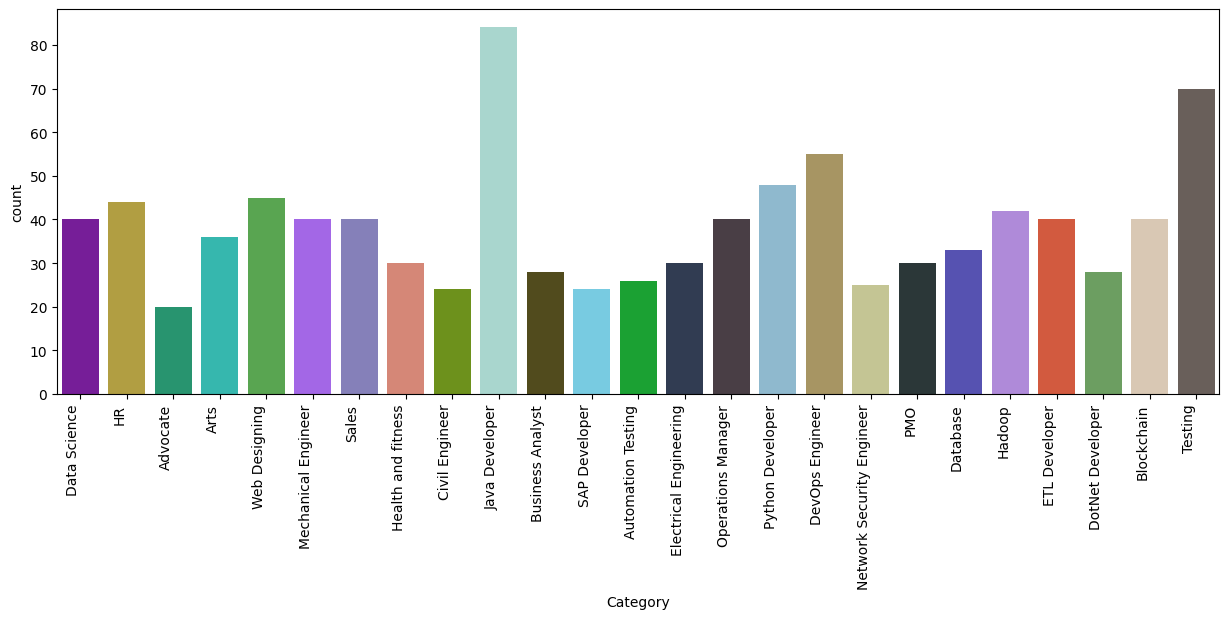

In [7]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x='Category', data=df, hue='Category', palette=random_colors, legend = False)
tick_labels = df['Category'].unique()
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

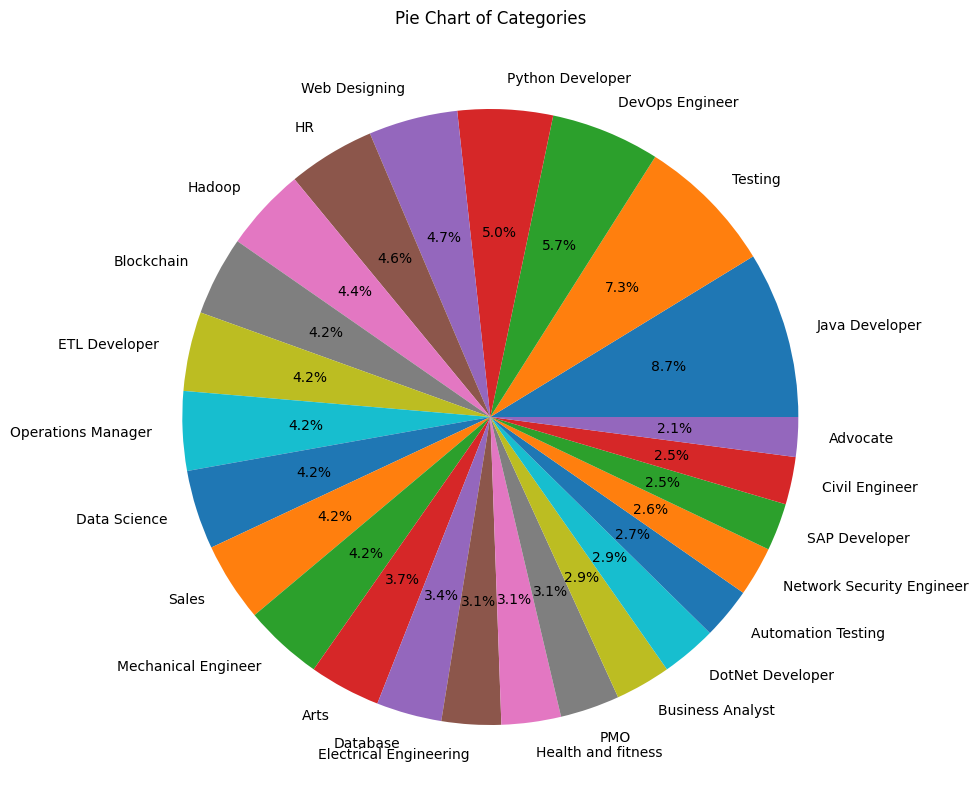

In [9]:
plt.figure(figsize=(15,10))
category_counts = df['Category'].value_counts()
plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

# Exploring Resume

In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
df['Category'][0]

'Data Science'

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data

In [13]:
import re
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s',' ',txt)
    cleanText = re.sub(r'RT|cc',' ',cleanText)
    cleanText = re.sub(r'#\S+\s',' ',cleanText)
    cleanText = re.sub(r'@\S+',' ',cleanText)
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ',cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ',cleanText)
    cleanText = re.sub('\\s+', ' ', cleanText)
    return cleanText

In [14]:
cleanResume ("my #### $ # @Tapas website link is http://tapasray.co.in")

'my website link is http tapasray co in'

In [15]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [16]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [19]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [20]:
#array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#      'Mechanical Engineer', 'Sales', 'Health and fitness',
#      'Civil Engineer', 'Java Developer', 'Business Analyst',
#      'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#      'Operations Manager', 'Python Developer', 'DevOps Engineer',
#      'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#      'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#     dtype=object)

# Vactorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

# Splitting

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(requiredText, df['Category'], test_size = 0.2, random_state = 42)

In [24]:
X_train.shape

(769, 7351)

In [25]:
X_test.shape

(193, 7351)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypredict = clf.predict(X_test)
print(accuracy_score(y_test,ypredict))

0.9844559585492227


In [27]:
ypredict

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

# Prediction System

In [28]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [29]:
Myresume = """ TAPAS RAY
 +91-7978678979
 tapasray207@gmail.com
 Gangadhar Nagar, Bargarh, Odisha
 www.linkedin.com/in/tapas-ray-tray25
 As a passionate and committed postgraduate student studying computer science, I am excited to use my
 background in academia and my love of programming to contribute to creative initiatives and gain knowledge
 from seasoned experts in the area. 
EDUCATION
 Utkal University
 Master's Degree in Computer Science
 2022 – 2024
 Sambalpur University
 Bachelor’s Degree in Computer Science
 2018 – 2021     C.G.P.A- 7.68
 CERTIFICATION
 Data Fundamentals by IBM SkillBuild :- 
https://www.credly.com/badges/a54d9907-4ec7-43f3-8f69
38ea96143366/public_url
 Artificial Intelligence Fundamentals by IBM SkillBuild :- 
https://www.credly.com/badges/a1c64da2-2d3a-4cc5-a89f
985890c943cb/public_url
 SKILLS
 Programming Languages - C++, Python.
 Databases - MySQL,
 Data Analysis, Data Visualization, Data science,
 Data Cleaning and Refining
 Tools - Jupyter notebook, VS code, GitHub,
 Scikit -learn, Matplotlib, Microsoft Excel
 Web Technology - HTML, CSS, JavaScript, React
 LANGUAGES
 English (Expert)
 Hindi (Native)
 Odia (Fluent)
 PROJECTS
 Credit Card Fraud Detection Using Machine Learning : —
 2024 - Present
 The goal of this initiative was scholarly. This project's objective was
 to evaluate three well-known machine learning models—Random
 Forest, Decision Tree, and Logical Regression—on a collection of
 data. comprising credit card transaction data and determine which
 one has the best accuracy rating for identifying fraudulent
 transactions. 
Technology Used: 
Python Programming Language
 Jupyter Notebook
 NumPy
 Pandas
 Scikit-learn
 Matplotlib
 Seaborn
 AREA OF INTEREST
 Artificial Intelligence
 Machine Learning
 Data Science
 Deep Learning
 Application Development
 Web Development
 """

In [30]:
import pickle

clf = pickle.load(open('clf.pkl','rb'))

cleaned_resume = cleanResume(Myresume)

input_feature = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_feature)[0]

category_mapping = {
    6: "Data Science",
    12: "HR",
    0: "Advocate",
    1: "Arts",
    24: "Web Designing",
    16: "Mechanical Engineer",
    22: "Sales",
    14: "Health and fitness",
    5: "Civil Engineer",
    15: "Java Developer",
    4: "Business Analyst",
    21: "SAP Developer",
    2: "Automation Testing",
    11: "Electrical Engineering",
    18: "Operations Manager",
    20: "Python Developer",
    8: "DevOps Engineer",
    17: "Network Security Engineer",
    19: "PMO",
    7: "Database",
    13: "Hadoop",
    10: "ETL Developer",
    9: "DotNet Developer",
    3: "Blockchain",
    23: "Testing",
}
category_name = category_mapping.get(prediction_id,"Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
